### DC 15 Day Forecast: COVID-19 Deaths

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC  
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
covid = pd.read_csv("covid-states.csv")
covid.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-12-02,AK,A,122.0,122.0,0,NaN,768.0,768.0,164.0,...,1024643.0,6015,NaN,NaN,NaN,NaN,NaN,0,1024643.0,6015
1,2020-12-02,AL,A,3711.0,3326.0,73,385.0,25821.0,25821.0,1801.0,...,1603523.0,9681,NaN,NaN,73187.0,NaN,1603523.0,9681,NaN,0
2,2020-12-02,AR,A+,2522.0,2312.0,10,210.0,9110.0,9110.0,1088.0,...,1703266.0,11813,NaN,21856.0,NaN,144866.0,NaN,0,1703266.0,11813
3,2020-12-02,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,...,1988.0,0,NaN,NaN,NaN,NaN,NaN,0,1988.0,0
4,2020-12-02,AZ,A+,6739.0,6237.0,52,502.0,26312.0,26312.0,2699.0,...,2288204.0,16290,365871.0,NaN,NaN,NaN,2288204.0,16290,NaN,0


In [3]:
#print("Size/Shape of the dataset",covid.shape)
#print("Checking for null values:\n",covid.isnull().sum())
#print("Checking Data-type:",covid.dtypes)

In [4]:
covid.columns

Index(['date', 'state', 'dataQualityGrade', 'death', 'deathConfirmed',
       'deathIncrease', 'deathProbable', 'hospitalized',
       'hospitalizedCumulative', 'hospitalizedCurrently',
       'hospitalizedIncrease', 'inIcuCumulative', 'inIcuCurrently', 'negative',
       'negativeIncrease', 'negativeTestsAntibody',
       'negativeTestsPeopleAntibody', 'negativeTestsViral',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'positive',
       'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral'

In [5]:
#Drop columns
covid.drop(['dataQualityGrade','deathIncrease',\
       'deathProbable','hospitalizedCumulative','hospitalizedIncrease',\
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',\
       'negativeTestsViral', 'onVentilatorCumulative','positiveScore',\
       'positiveTestsAntibody', 'positiveTestsAntigen',\
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',\
       'totalTestEncountersViralIncrease', 'totalTestResults',\
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',\
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen'],1,inplace = True)

In [6]:
covid.columns

Index(['date', 'state', 'death', 'deathConfirmed', 'hospitalized',
       'hospitalizedCurrently', 'inIcuCumulative', 'inIcuCurrently',
       'negative', 'negativeIncrease', 'onVentilatorCurrently', 'positive',
       'positiveCasesViral', 'positiveIncrease', 'positiveTestsViral',
       'recovered', 'totalTestEncountersViral', 'totalTestsPeopleViral',
       'totalTestsPeopleViralIncrease', 'totalTestsViral',
       'totalTestsViralIncrease'],
      dtype='object')

In [7]:
#Data Analysis for Washington DC
dc_data = covid[covid["state"]=="DC"]
dc_data.head()

,date,state,death,deathConfirmed,hospitalized,hospitalizedCurrently,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,...,positive,positiveCasesViral,positiveIncrease,positiveTestsViral,recovered,totalTestEncountersViral,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
8,2020-12-02,DC,690.0,NaN,NaN,165.0,NaN,41.0,679643.0,3919,...,21842.0,NaN,157,NaN,16070.0,701485.0,308164.0,828,NaN,0
64,2020-12-01,DC,685.0,NaN,NaN,160.0,NaN,43.0,675724.0,2020,...,21685.0,NaN,133,NaN,15914.0,697409.0,307336.0,889,NaN,0
120,2020-11-30,DC,680.0,NaN,NaN,158.0,NaN,43.0,673704.0,4810,...,21552.0,NaN,104,NaN,15746.0,695256.0,306447.0,884,NaN,0
176,2020-11-29,DC,680.0,NaN,NaN,145.0,NaN,42.0,668894.0,4864,...,21448.0,NaN,140,NaN,15671.0,690342.0,305563.0,1530,NaN,0
232,2020-11-28,DC,678.0,NaN,NaN,157.0,NaN,41.0,664030.0,12528,...,21308.0,NaN,371,NaN,15603.0,685338.0,304033.0,4071,NaN,0


In [8]:
dc_data = dc_data.fillna(0)
dc_data.head()

,date,state,death,deathConfirmed,hospitalized,hospitalizedCurrently,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,...,positive,positiveCasesViral,positiveIncrease,positiveTestsViral,recovered,totalTestEncountersViral,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
8,2020-12-02,DC,690.0,0.0,0.0,165.0,0.0,41.0,679643.0,3919,...,21842.0,0.0,157,0.0,16070.0,701485.0,308164.0,828,0.0,0
64,2020-12-01,DC,685.0,0.0,0.0,160.0,0.0,43.0,675724.0,2020,...,21685.0,0.0,133,0.0,15914.0,697409.0,307336.0,889,0.0,0
120,2020-11-30,DC,680.0,0.0,0.0,158.0,0.0,43.0,673704.0,4810,...,21552.0,0.0,104,0.0,15746.0,695256.0,306447.0,884,0.0,0
176,2020-11-29,DC,680.0,0.0,0.0,145.0,0.0,42.0,668894.0,4864,...,21448.0,0.0,140,0.0,15671.0,690342.0,305563.0,1530,0.0,0
232,2020-11-28,DC,678.0,0.0,0.0,157.0,0.0,41.0,664030.0,12528,...,21308.0,0.0,371,0.0,15603.0,685338.0,304033.0,4071,0.0,0


In [9]:
dc_data.drop(['deathConfirmed','hospitalized','inIcuCumulative',\
       'positiveCasesViral', 'positiveTestsViral',\
       'totalTestsViral','totalTestsViralIncrease'],1,inplace = True)

In [10]:
dc_data = dc_data.sort_values(by = 'date', ascending = True)
dc_data.head()

,date,state,death,hospitalizedCurrently,inIcuCurrently,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestEncountersViral,totalTestsPeopleViral,totalTestsPeopleViralIncrease
15173,2020-03-05,DC,0.0,0.0,0.0,6.0,0,0.0,0.0,0,0.0,6.0,0.0,0
15136,2020-03-06,DC,0.0,0.0,0.0,8.0,2,0.0,0.0,0,0.0,8.0,0.0,0
15087,2020-03-07,DC,0.0,0.0,0.0,8.0,0,0.0,0.0,0,0.0,8.0,0.0,0
15036,2020-03-08,DC,0.0,0.0,0.0,10.0,2,0.0,1.0,1,0.0,11.0,0.0,0
14985,2020-03-09,DC,0.0,0.0,0.0,14.0,4,0.0,1.0,0,0.0,15.0,0.0,0


In [11]:
# Export the DC data csv 
dc_data.to_csv("dc_covid.csv")

In [12]:
dc_data.dtypes

date                              object
state                             object
death                            float64
hospitalizedCurrently            float64
inIcuCurrently                   float64
negative                         float64
negativeIncrease                   int64
onVentilatorCurrently            float64
positive                         float64
positiveIncrease                   int64
recovered                        float64
totalTestEncountersViral         float64
totalTestsPeopleViral            float64
totalTestsPeopleViralIncrease      int64
dtype: object

In [13]:
# Specified data columns
X = dc_data[['hospitalizedCurrently','inIcuCurrently','onVentilatorCurrently','positive',\
             'totalTestEncountersViral',\
             'totalTestsPeopleViral']]
y = dc_data['death']
#weight train
wt=[1/y.shape[0]*i for i in range(y.shape[0])]

<AxesSubplot:xlabel='date', ylabel='totalTestEncountersViral'>

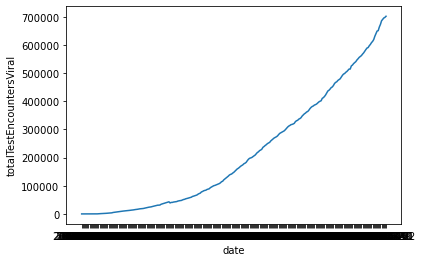

In [14]:
sns.lineplot(x='date',y='totalTestEncountersViral',data=dc_data)

<AxesSubplot:xlabel='date', ylabel='hospitalizedCurrently'>

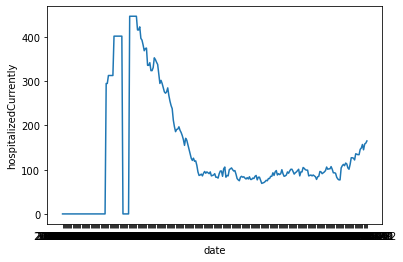

In [15]:
sns.lineplot(x='date',y='hospitalizedCurrently',data=dc_data)

<AxesSubplot:xlabel='date', ylabel='inIcuCurrently'>

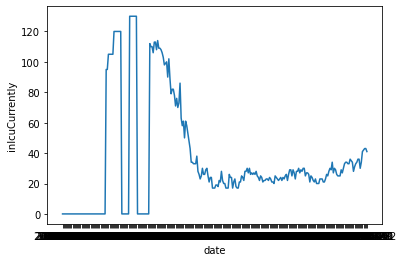

In [16]:
sns.lineplot(x='date',y='inIcuCurrently',data=dc_data)

<AxesSubplot:xlabel='date', ylabel='onVentilatorCurrently'>

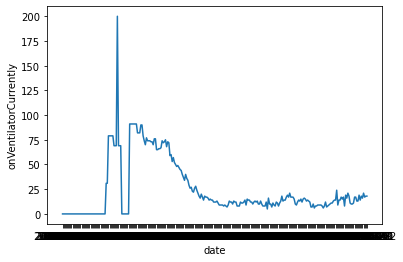

In [17]:
sns.lineplot(x='date',y='onVentilatorCurrently',data=dc_data)

### Too many fluctuations in the above plotted data 
- need to smooth the data
- not ideal for a Linear Regression model
- apply the moving average...

In [18]:
dc_data.set_index('date', inplace =True)

In [19]:
# Specified data columns
X = dc_data[['hospitalizedCurrently','inIcuCurrently','onVentilatorCurrently','positive',\
             'totalTestEncountersViral',\
             'totalTestsPeopleViral']]
y = dc_data['death']

In [20]:
print(X.shape, y.shape)

(273, 6) (273,)


In [21]:
#sns.regplot(x='date',y='positive',data = dc_data.reset_index())

<Figure size 1440x720 with 0 Axes>

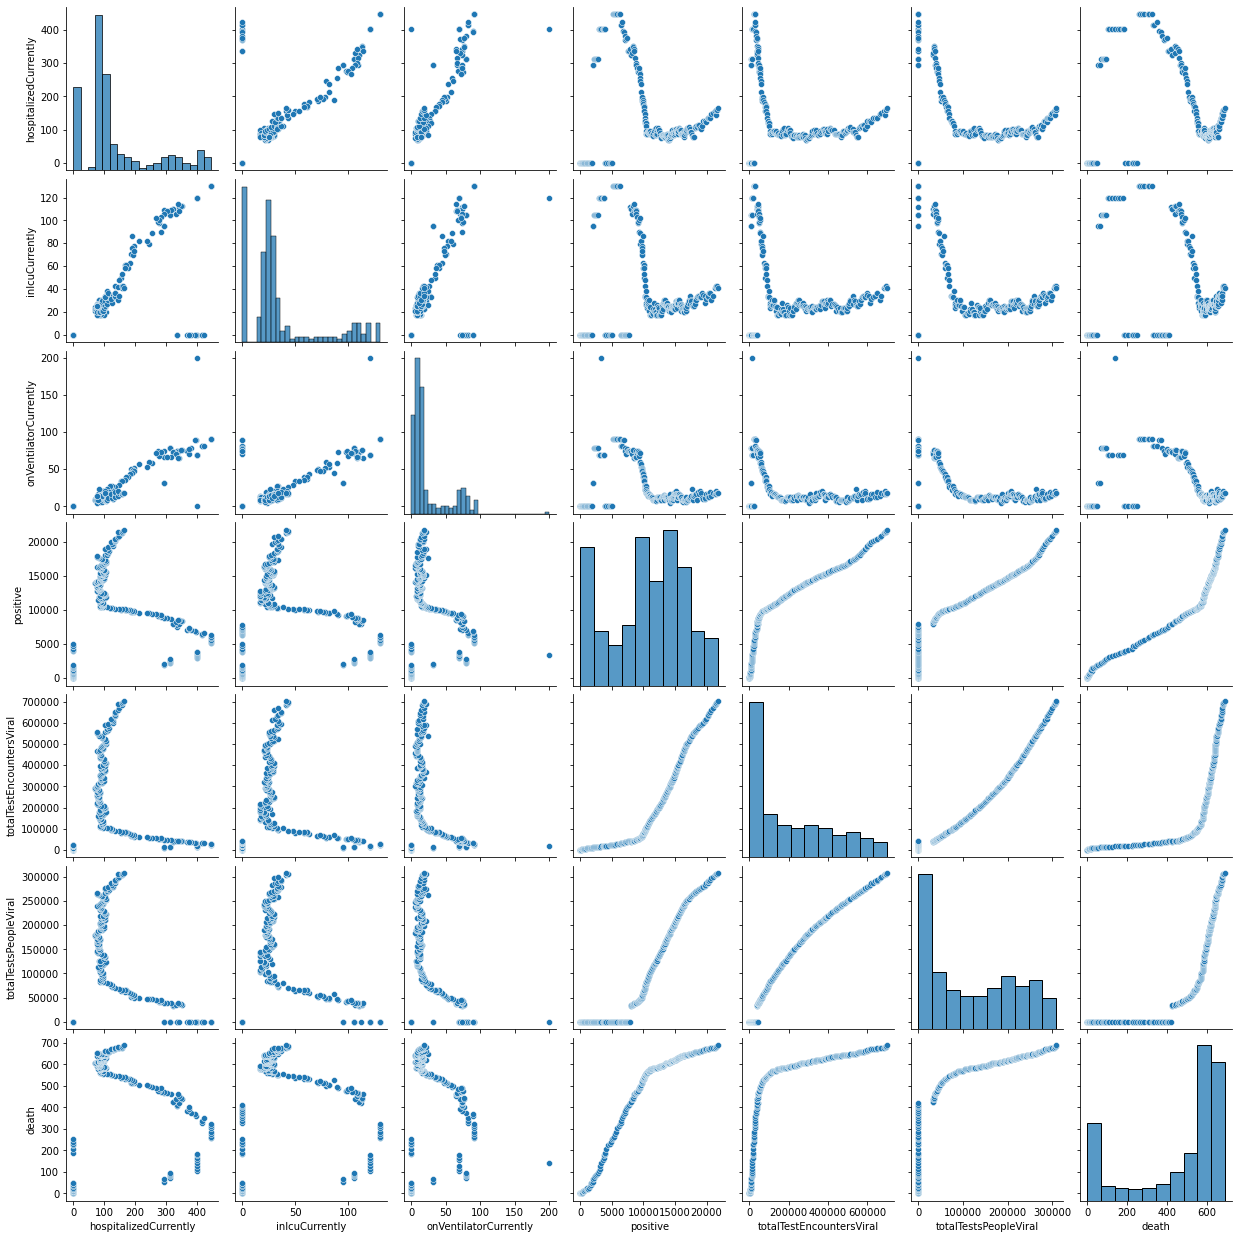

In [22]:
#Plot the data to view correlations
data_numeric = dc_data[['hospitalizedCurrently','inIcuCurrently','onVentilatorCurrently','positive',\
             'totalTestEncountersViral',\
             'totalTestsPeopleViral','death']]
plt.figure(figsize=(20, 10))
sns.pairplot(data_numeric)
plt.show()

## Model - LinearRegression

In [23]:
# Specified data columns
# Reshape your data either using array.reshape(-1, 1) 
#if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
X = dc_data[['hospitalizedCurrently','inIcuCurrently','onVentilatorCurrently','positive',\
             'totalTestEncountersViral',\
             'totalTestsPeopleViral']]
y = dc_data['death'].values.reshape(-1,1)

In [24]:
#number of 15 days forecast - split test data into future and training data into past
n_days = 15
X_train = X.iloc[0:-n_days,:]
y_train = y[0:-n_days,:]
wt_train = wt[0:-n_days]
X_test = X.iloc[-n_days:,:]
y_test = y[-n_days:,:]

In [25]:
X_train.head()

,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,positive,totalTestEncountersViral,totalTestsPeopleViral
date,,,,,,
2020-03-05,0.0,0.0,0.0,0.0,6.0,0.0
2020-03-06,0.0,0.0,0.0,0.0,8.0,0.0
2020-03-07,0.0,0.0,0.0,0.0,8.0,0.0
2020-03-08,0.0,0.0,0.0,1.0,11.0,0.0
2020-03-09,0.0,0.0,0.0,1.0,15.0,0.0


In [26]:
model = LinearRegression()
model

LinearRegression()

In [27]:
model.fit(X_train, y_train, sample_weight=wt_train)

LinearRegression()

In [28]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [29]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.9967707477407165
Testing Data Score: -88.65248619071278


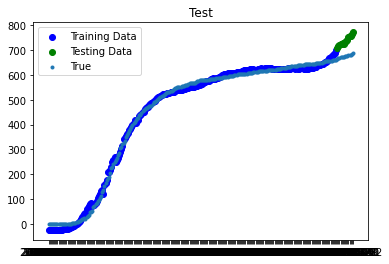

In [30]:
x = dc_data.index.values
x_train = x[:-n_days]
x_test = x[-n_days:]

plt.scatter(x_train,y_pred_train, c="blue", label="Training Data")
plt.scatter(x_test,y_pred_test, c="green", label="Testing Data")
plt.scatter(x,y, marker=".", label="True")

plt.legend()
plt.title("Test")
plt.show()

### Linear Model likes straight lines 
- it is trying to fit a regression line at the end and on a small dateset
- over projecting the peak
- DC has a small population


In [31]:
print('Weight coefficients:', model.coef_)
print('y-axis intercept:', model.intercept_)

Weight coefficients: [[ 1.43484350e-02 -1.60659765e-01 -1.84551715e-01  6.26128236e-02
  -8.52098292e-04  1.06302641e-04]]
y-axis intercept: [-23.54968366]


#### Sklearn provides a variety of scaling and normalization options. The two most common are minmax and StandardScaler. Use StandardScaler when you don't know anything about your data. 

In [32]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [33]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

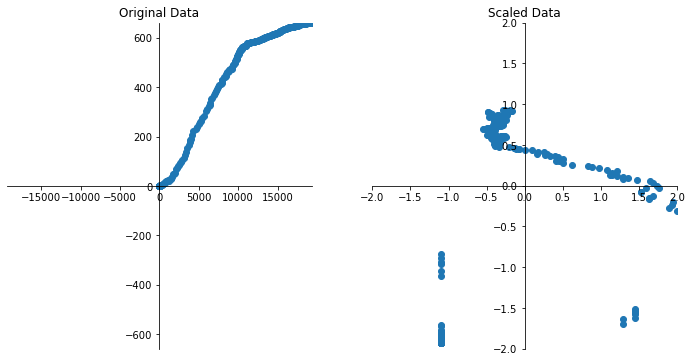

In [34]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["positive"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["positive"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

###  Fit the Model to the scaled training data and make predictions using the scaled test data

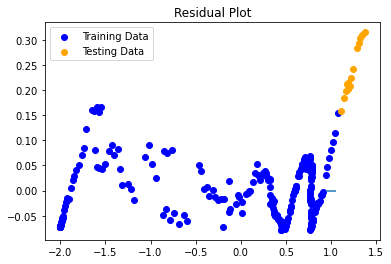

In [35]:
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [36]:
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)
y_minmax = MinMaxScaler().fit(y_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)
y_train_minmax = y_minmax.transform(y_train)
y_test_minmax = y_minmax.transform(y_test)

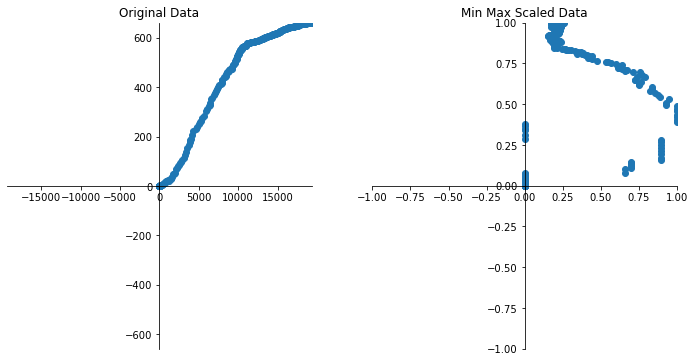

In [37]:
## Specified the maxx - X_train to'positive' as this was the highest Coeff value 0.0590678 - Should this be the maxx?

fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Min Max Scaled Data")

maxx = X_train["positive"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-1, 1)
axes2.set_ylim(-1, 1)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["positive"], y_train)
axes2.scatter(X_train_minmax[:,0], y_train_minmax[:])

## Quantify the model using scaled data

In [38]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.05876739627411214, R2: -70.68374939993532


## Score for non-scaled data

In [39]:
predicted = model.predict(X)

In [40]:
#Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 31551971048.647846
R-squared (R2): -592515.0375312405


In [41]:
# Overall score for the model
model.score(X,y)

-592515.0375312405